In [1]:
import xarray as xr
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from flaml import AutoML
ds=xr.open_dataset('chirps-v2_monthly_africa_2.5.nc')
df=ds['precip'].to_dataframe().reset_index()
len_nan=df['precip'].isna().sum().sum()
df=df.sample(frac=0.2,random_state=42)
x_train,x_test=df.dropna(subset='precip'),df[df['precip'].isna()]
y_train=df[~df['precip'].isna()]['precip']

In [3]:
automl_reg = AutoML()
automl_reg.fit(x_train, y_train, task="regression", verbose=False,time_budget=200)
y_pred = automl_reg.predict(x_test)
print(y_pred)

[9.38782731 9.38782731 9.38782731 ... 9.38782731 9.38782731 9.38782731]


In [4]:
y_pred=np.random.choice(y_pred,size=len_nan,replace=True)
print(len(y_pred))
df1=ds['precip'].to_dataframe().reset_index()
#print(df1['precip'].isna().sum().sum())
df1.loc[df1['precip'].isna(), 'precip'] = y_pred
df1

23838189


C:\Users\USER\AppData\Local\Temp\ipykernel_10092\1338614597.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.38782731 9.38782731 9.38782731 ... 9.38782731 9.38782731 9.38782731]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df1.loc[df1['precip'].isna(), 'precip'] = y_pred


,time,latitude,longitude,precip
0,1981-01-01,-39.874996,-19.875004,9.387827
1,1981-01-01,-39.874996,-19.625004,9.387827
2,1981-01-01,-39.874996,-19.375004,9.387827
3,1981-01-01,-39.874996,-19.125004,9.387827
4,1981-01-01,-39.874996,-18.875004,9.387827
...,...,...,...,...
49823995,2024-03-01,39.874992,53.875000,13.489058
49823996,2024-03-01,39.874992,54.125000,11.317730
49823997,2024-03-01,39.874992,54.375000,10.786901
49823998,2024-03-01,39.874992,54.625000,11.267644


In [8]:
print(df1['precip'].isna().sum().sum())

0


In [5]:
ds1=df1.set_index(['time','latitude','longitude']).to_xarray()
print(ds1['precip'])

<xarray.DataArray 'precip' (time: 519, latitude: 320, longitude: 300)> Size: 399MB
array([[[ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731,  9.38782731],
        [ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731,  9.38782731],
        [ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731,  9.38782731],
        ...,
        [ 9.38782731,  9.38782731,  9.38782731, ..., 16.50267982,
         15.63272762, 21.60180855],
        [ 9.38782731,  9.38782731,  9.38782731, ..., 14.34459591,
         20.46517754, 21.91301346],
        [ 9.38782731,  9.38782731,  9.38782731, ..., 16.8042984 ,
         20.19076157, 22.03339386]],

       [[ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731,  9.38782731],
        [ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731,  9.38782731],
        [ 9.38782731,  9.38782731,  9.38782731, ...,  9.38782731,
          9.38782731

In [9]:
ds_time=ds1['precip'].sel(time=ds1['time.month'].isin([10,11,12]))

In [10]:
mean_ond=ds_time.mean(dim='time')
std_ond=ds_time.std(dim='time')
print(std_ond)

<xarray.DataArray 'precip' (latitude: 320, longitude: 300)> Size: 768kB
array([[8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        8.88178420e-15, 8.88178420e-15, 8.88178420e-15],
       [8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        8.88178420e-15, 8.88178420e-15, 8.88178420e-15],
       [8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        8.88178420e-15, 8.88178420e-15, 8.88178420e-15],
       ...,
       [8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        5.76498518e+00, 5.19791892e+00, 5.98123393e+00],
       [8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        5.90364244e+00, 6.73965697e+00, 6.84888824e+00],
       [8.88178420e-15, 8.88178420e-15, 8.88178420e-15, ...,
        6.28564949e+00, 7.31585454e+00, 7.49598023e+00]])
Coordinates:
  * latitude   (latitude) float32 1kB -39.87 -39.62 -39.37 ... 39.38 39.62 39.87
  * longitude  (longitude) float32 1kB -19.88 -19.63 -19.38 ... 54.62 54.88


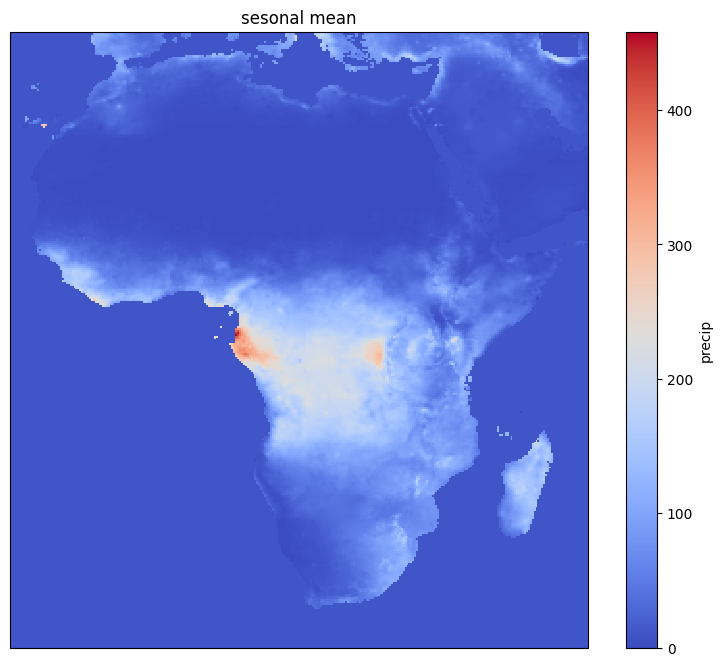

In [11]:
import cartopy.crs as ccrs
plt.figure(figsize=(10,8))
ax=plt.axes(projection=ccrs.PlateCarree())
mean_ond.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.title('sesonal mean')
plt.show()

In [12]:

data_1980_2000 = ds_time.sel(time=slice('1980', '2000'))
mean_data_1980_2000 = data_1980_2000.mean(dim='time')

lat_size = data_1980_2000.shape[1]
lon_size = data_1980_2000.shape[2]

trend = np.zeros((lat_size, lon_size))

for lat in range(lat_size):
    for lon in range(lon_size):
        time_series = data_1980_2000[:, lat, lon]
        slope, intercept = np.polyfit(np.arange(len(time_series)), time_series, 1)
        trend[lat, lon] = slope



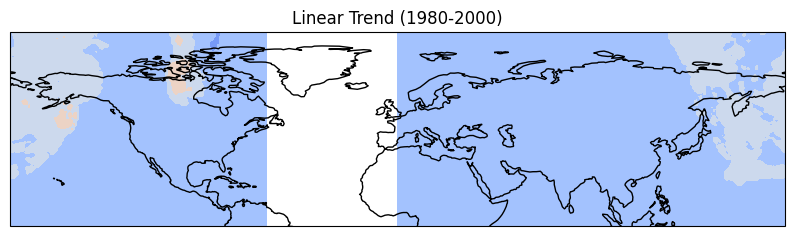

In [13]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(trend, cmap='coolwarm', transform=ccrs.PlateCarree())
ax.coastlines()
plt.title("Linear Trend (1980-2000)")
plt.show()


In [14]:
data_2000_2020 = ds_time.sel(time=slice('2000', '2020'))
mean_data_1980_2000 = data_2000_2020.mean(dim='time')

lat_size = data_1980_2000.shape[1]
lon_size = data_1980_2000.shape[2]

trend = np.zeros((lat_size, lon_size))

for lat in range(lat_size):
    for lon in range(lon_size):
        time_series = data_1980_2000[:, lat, lon]
        slope, intercept = np.polyfit(np.arange(len(time_series)), time_series, 1)
        trend[lat, lon] = slope

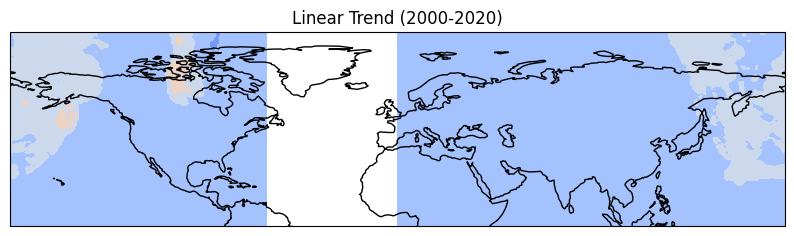

In [15]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(trend, cmap='coolwarm', transform=ccrs.PlateCarree())
ax.coastlines()
plt.title("Linear Trend (2000-2020)")
plt.show()